In [ ]:
!pip install 'tensorflow==2.6.2'

In [2]:
!pip install --upgrade 'numpy==1.20'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp39-cp39-manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.2 requires numpy~=1.19.2, but you have numpy 1.20.0 which is incompatible.
pandas 1.5.3 requires numpy>=1.20.3; python_version < "3.10", but you have numpy 1.20.0 which is incompatible.
optax 0.1.4 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.
ml-dtypes 0.0.4 requires numpy>1.20, but you have numpy 1.20.0 which is incompatible.
librosa 0.10.0.post2 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.20.0 which i

In [3]:
import keras
import tensorflow as tf
import numpy as np
import cv2
from typing import List, Tuple

In [4]:
np.__version__

'1.20.0'

In [5]:
tf.__version__

'2.6.2'

In [6]:
import matplotlib.pyplot as plt 

In [7]:
model = keras.models.load_model('/content/BLC_old_tf_version.h5')
if model is None:
  print("0")

In [ ]:
model.compile(optimizer='sgd')

In [11]:
model.optimizer

In [ ]:
model.save_weights('/content/BLC_weights.h5')

In [8]:
def predict_blc(_model, images: np.ndarray) -> List[bool]:
  return([bool(x) for x in _model.predict(images, verbose=False) > 0.5])

def preprocess_blc(img: np.ndarray) -> np.ndarray:
  img = cv2.resize(img, (64, 64))[:, :, ::-1]
  img = img.astype(np.float32) / 255.
  return img[:, :, :3]

In [9]:
dummy_img = np.zeros((1, 64, 64, 3), dtype=np.float32)
##pred = model.predict(dummy_img, verbose=False)
pred = predict_blc(model, dummy_img)
print(f"Image shape:{dummy_img.shape}\nPred:{pred}")

Image shape:(1, 64, 64, 3)
Pred:[False]


In [10]:
green = preprocess_blc(cv2.imread("/content/green_test.jpg"))
other = preprocess_blc(cv2.imread("/content/other_img.jpg"))
back = preprocess_blc(cv2.imread("/content/back.jpg"))
side = preprocess_blc(cv2.imread("/content/side.jpg"))
red = preprocess_blc(cv2.imread("/content/red.jpg"))
yellow = preprocess_blc(cv2.imread("/content/yellow.jpg"))
tl = preprocess_blc(cv2.imread("/content/tl_image.jpg"))

stack = np.stack([green, other, back, side, red, yellow, tl])

print(f"After preprocess:{stack.shape}")

After preprocess:(7, 64, 64, 3)


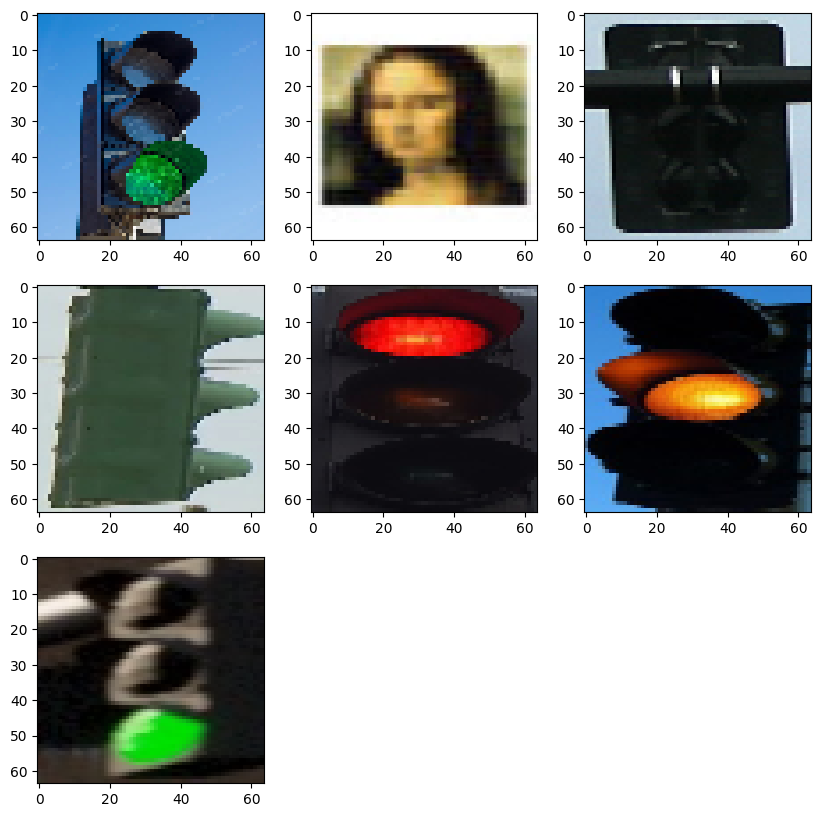

In [11]:
plt.figure(figsize=(10, 10))
for i in range(len(stack)):
     ax = plt.subplot(3, 3, i + 1)
     plt.imshow(stack[i])

In [12]:
pred_g = predict_blc(model, stack)
pred_s = model.predict(stack)
print(f"Pred source:{pred_s}\nPred:{pred_g}")

Pred source:[[0.9689982 ]
 [0.42697144]
 [0.41719088]
 [0.4196698 ]
 [0.7141125 ]
 [0.80204725]
 [0.99943036]]
Pred:[True, False, False, False, True, True, True]
